In [3]:
# for data analysis
import pandas as pd 
import numpy as np
import random as rnd
import sys

# for data viz
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

# for machine learning 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
train_data = pd.read_csv('processed_cleveland_data_train.csv')
test_data = pd.read_csv('processed_cleveland_data_test.csv')

# Parameter of interest is num, for now this is a binary problem
def make_prediction_var_binary(df):
    df['num'] = df['num'].replace([1, 2, 3, 4, 5, 6], 1)

        
make_prediction_var_binary(train_data)
make_prediction_var_binary(test_data)

train_data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
154,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
174,52,1,4,108,233,1,0,147,0,0.1,1,3,7,0
125,56,0,4,200,288,1,2,133,1,4.0,3,2,7,1
209,41,1,3,130,214,0,2,168,0,2.0,2,0,3,0
155,51,1,4,140,299,0,0,173,1,1.6,1,0,7,1


/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


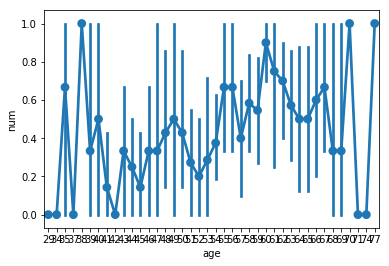

In [5]:
sns.pointplot(x='age', y='num', data=train_data)

In [6]:
test_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,42,1,2,120,295,0,0,162,0,0.0,1,0,3,0
1,41,1,2,110,235,0,0,153,0,0.0,1,0,3,0
2,41,0,2,126,306,0,0,163,0,0.0,1,0,3,0
3,49,0,4,130,269,0,0,163,0,0.0,1,0,3,0
4,61,1,1,134,234,0,0,145,0,2.6,2,2,3,1


In [7]:
from sklearn.model_selection import train_test_split

X_train = train_data.drop(['num'], axis=1)
y_train = train_data['num']

X_test = test_data.drop(['num'], axis=1)
y_test = test_data['num']

y_train.head()

0    0
1    1
2    1
3    0
4    0
Name: num, dtype: int64

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose classifer 

clf = RandomForestClassifier()

# Choose Parameters and stuff
parameters = {'n_estimators': [4,6,9],
             'max_features': ['log2', 'sqrt', 'auto'],
             'criterion': ['entropy', 'gini'],
             'max_depth': [2, 3, 5, 10],
             'min_samples_split': [2, 3, 5],
             'min_samples_leaf': [1, 5, 8]}

# Type of scoring to compare parameter combos 
acc_scorer = make_scorer(accuracy_score)

# Run grid search 
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Pick the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data 
clf.fit(X_train, y_train)

/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [9]:
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.7540983606557377


In [ ]:
# Cross Validation with KFold
from sklearn.model_selection import KFold

all_data = pd.read_csv('processed_cleveland_data.csv')
replace_predict(all_data)

Xall = all_data.drop(['num'], axis=1)
Yall = all_data['num']


Y_all.head()

def run_kfold(model):
    kf = KFold(n_splits=5)
    outcomes = []
    fold = 0
    for train_index, test_index in kf.split(X_all):
        fold += 1
        Xtrain, Xtest = X_all.values[train_index], X_all.values[test_index]
        Ytrain, Ytest = Y_all.values[train_index], Yall.values[test_index]
        model.fit(Xtrain, Ytrain)
        predictions = model.predict(Xtest)
        accuracy = accuracy_score(Ytest, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy)) 
        mean_outcome = np.mean(outcomes)
        print("Mean Accuracy: {0}".format(mean_outcome)) 

run_kfold(model)
    